In [28]:
import os
root_path = os.getcwd().replace("/notebook", "")
root_path

'/home/lf/Documents/Python workspace/MRMR'

In [29]:
!pip install opencv-python

In [30]:
!pip install tensorflow-gpu

In [31]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

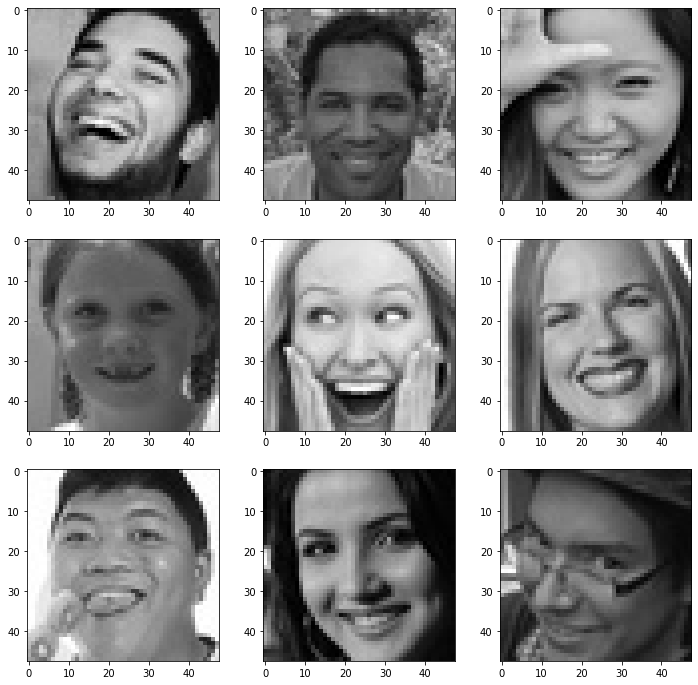

In [32]:
picture_size = 48
folder_path = f'{root_path}/dataset/'
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [33]:
train_dir = f'{folder_path}train'
val_dir = f'{folder_path}test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 17010 images belonging to 3 classes.
Found 4254 images belonging to 3 classes.


In [34]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(3, activation='softmax'))

In [35]:
checkpoint_filepath = root_path
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [37]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=[model_checkpoint_callback])

Epoch 1/50
266/266 [==============================] - 50s 187ms/step - loss: 0.9703 - accuracy: 0.5303 - val_loss: 0.9253 - val_accuracy: 0.5658
Epoch 2/50
266/266 [==============================] - 51s 193ms/step - loss: 0.9027 - accuracy: 0.5812 - val_loss: 0.8707 - val_accuracy: 0.5905
Epoch 3/50
266/266 [==============================] - 52s 194ms/step - loss: 0.8579 - accuracy: 0.6052 - val_loss: 0.8111 - val_accuracy: 0.6272
Epoch 4/50
266/266 [==============================] - 49s 183ms/step - loss: 0.8171 - accuracy: 0.6262 - val_loss: 0.7895 - val_accuracy: 0.6349
Epoch 5/50
266/266 [==============================] - 49s 184ms/step - loss: 0.7812 - accuracy: 0.6436 - val_loss: 0.7564 - val_accuracy: 0.6544
Epoch 6/50
266/266 [==============================] - 49s 183ms/step - loss: 0.7561 - accuracy: 0.6586 - val_loss: 0.7348 - val_accuracy: 0.6688
Epoch 7/50
266/266 [==============================] - 49s 183ms/step - loss: 0.7309 - accuracy: 0.6707 - val_loss: 0.7149 - val_ac

In [38]:
emotion_model.save('model.h5')